Social network advertising, also social media targeting, is a group of terms that are used to describe forms of online advertising/digital marketing that focus on social networking services. One of the major benefits of this type of advertising is that advertisers can take advantage of the users' demographic information and target their ads appropriately.

Social media targeting combines current targeting options (such as geotargeting, behavioral targeting, socio-psychographic targeting, etc.), to make detailed target group identification possible. With social media targeting, advertisements are distributed to users based on information gathered from target group profiles.

Social network advertising is not necessarily the same as social media targeting. Social media targeting is a method of optimizing social media advertising by using profile data to deliver advertisements directly to individual users. Social network advertising refers to the process of matching social network users to target groups that have been specified by the advertiser. Social media advertising involves creating content on social media platforms, engaging with followers, and running social media advertisements.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Social_network_advertising)

For this assignment, we will take a look at how Social Network pick who to advertise using k-Nearest Neighbor algorithm. We will leverage the [Social Network Ads dataset](https://www.kaggle.com/rakeshrau/social-network-ads).

First, let's import the data

# Learning Objectives
- Define basic terminology of machine learning.
- Describe a typical machine learning modeling process.
- Demonstrate the ability to use K-Nearest Neighbor algorithm.
- Demonstrate the ability to tweak K-Nearest Neighbor algorithm.
- Demonstrate the ability to determine the accuracy of a model.

In [317]:
import numpy as np
import pandas as pd

SNA = pd.read_csv('./Social_Network_Ads.csv')

Question 1: Print the top 10 rows of the dataset

In [318]:
# Display the top 10 rows (using head()) of the dataset
display(SNA.head(10))

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


Question 1.2: Drop the User Id column from the SNA dataframe using [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method

In [319]:
# Simply drop the User ID column by specifying which columns to drop, in this case only 1 named 'User ID'
SNA_edited = SNA.drop(columns=['User ID'])
display(SNA_edited)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


Question 2.1: Within the Gender column, replace the text Male and Female with 0 and 1 respectively. You can use [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method.

In [320]:
# Replace all Male, Female entries with 0, 1 respectively inplace in the Gender column
SNA_edited.Gender.replace(['Male', 'Female'], ['0', '1'], inplace=True)

Question 2.2: Check if successful by printing top 10 rows

In [321]:
SNA_edited.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
5,0,27,58000,0
6,1,27,84000,0
7,1,32,150000,1
8,0,25,33000,0
9,1,35,65000,0


As part of any machine learning problem, we need to explore the data and perform exploratory data analysis. For the next set of questions, we will be using [seaborn](https://seaborn.pydata.org/index.html) library for visualization.

Question 3.1: Using Seaboard [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), create three pairwise scatter plots using Purchased column as hue for the following pairs:
1. Age & EstimatedSalary
2. Age & Gender
3. Gender & EstimatedSalary

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

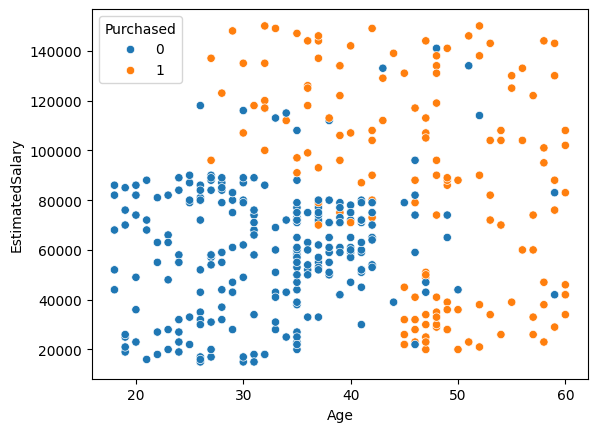

In [322]:
# Import seaborn
import seaborn as sns

sns.scatterplot(data = SNA_edited, x="Age", y="EstimatedSalary", hue="Purchased")

<Axes: xlabel='Age', ylabel='Gender'>

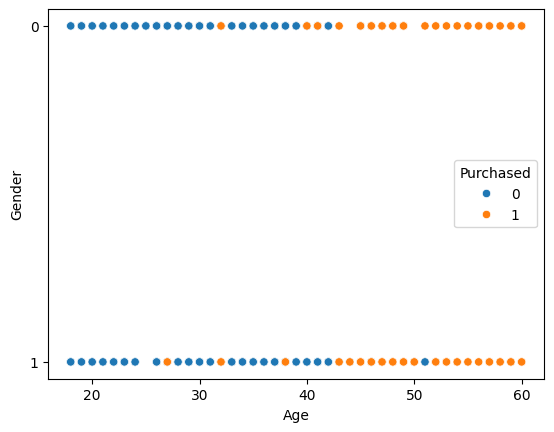

In [323]:

sns.scatterplot(data = SNA_edited, x="Age", y="Gender", hue="Purchased")

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

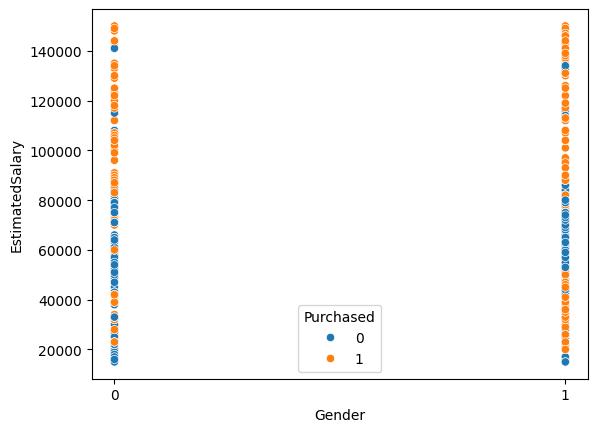

In [324]:
sns.scatterplot(data=SNA_edited, x="Gender", y="EstimatedSalary", hue="Purchased")


# Scatterplot Analysis

## Age + Estimated Salary

Has a pretty clean gradient towards the upper right quadrant of the 2-dimensional chart indicating age and salary are good predictors of purchase.

## Age + Gender

Again shows that the further we move along the x-axis (Age), the more likely we are to see a purchase regardless of gender (0/1)

## Gender + Estimated Salary

Seems to show that higher earners will purchase the product, some female-identifying individuals may buy it at lower salaries at a higher rate.

Question 3.2: Based on the above plots, which feature(s) can be best used to determine if a person will purchase an item based on Ad?

Age & EstimatedSalary

Question 3.3: Use histogram plots to validate your answer. Set the Hue to be 'Purchased'

<Axes: xlabel='Age', ylabel='Count'>

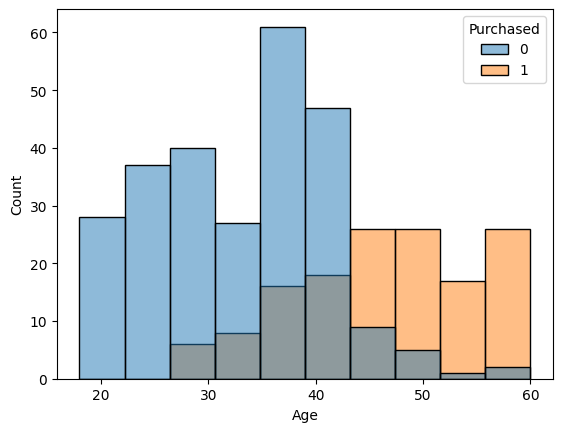

In [325]:
# Here we see older individuals purchased more often
sns.histplot(data=SNA_edited, x="Age", hue="Purchased")

<Axes: xlabel='Gender', ylabel='Count'>

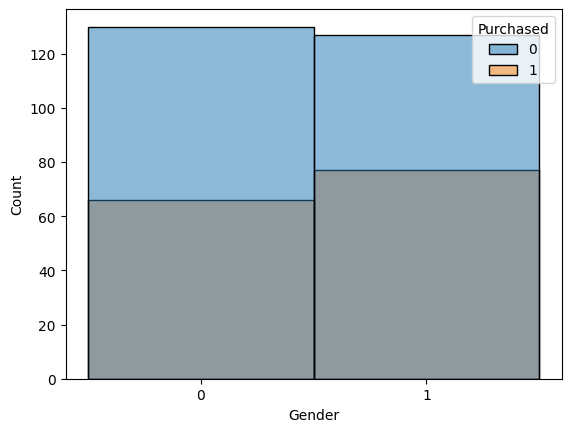

In [326]:
# x=age and y=gender is pretty useless to look at, pretty terrible visualization do not recommend
# sns.histplot(data=SNA_edited, x="Age", y="Gender", hue="Purchased")
# Here we can see gender has almost no difference on the purchase
sns.histplot(data=SNA_edited, x="Gender", hue="Purchased")

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

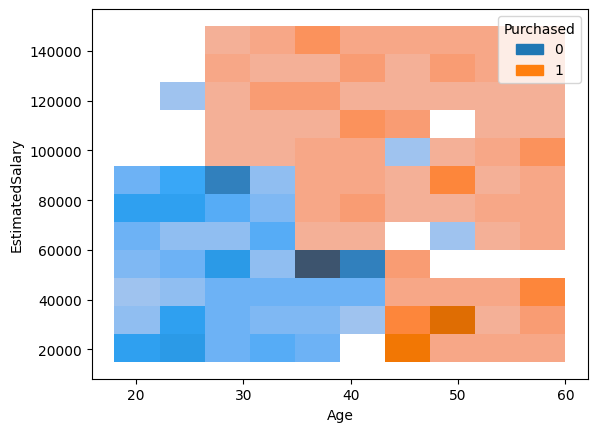

In [327]:
# Here we do a simple check over EstimatedSalary
# sns.histplot(data=SNA_edited, x="EstimatedSalary", hue="Purchased")
# Here we can do a plot based on salary and age and we can see the further-right x-axis (older individuals regardless) is buying, although salary has some measure for younger individuals
sns.histplot(data=SNA_edited, x="Age", y="EstimatedSalary", hue="Purchased")

# Histogram Analysis

Above we state that Age + Estimated Salary is the best predictor of a purchase.

## Age

Again the overlay shows as we move further to the right on the x-axis (Age) we see the purchases increase.

## Gender

Adding Age to this looks horrible, don't bother using this histogram. If you drop it down to just purchased by Gender and removing the rest of the data, you can see it has very little difference.

## Age + Estimated Salary

This histogram models the above scatterplot pretty accurately. The upper right quadrant shows an increase with some lower earners being more frequent above a certain age.

Question 4: Now that we have performed data exploration, lets experiment with k-NN algorithm. But first, we need to split the data into training and testing set. To perform this task, you can use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a 70/30 split for training and test data respectively.

In [328]:
# We want to predict if someone purchases
from sklearn.model_selection import train_test_split

X = SNA_edited.iloc[:,:-1] # Get every column except the last one as X
y = SNA_edited.iloc[:,-1] # This is the last column for 'Purchased'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Specify test_size because otherwise it'll fail, also since it randomly selects data points we may get different results

Question 5.1: Using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), write a k-NN classifier with n=2

In [329]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 2)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

Using [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), evaluate and print the classifier output

In [330]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Makes a prediction based on the model
y_pred = knn.predict(X_test)
# Generate a classification report
print(classification_report(y_test, y_pred))
# Generate a Confusion Matrix
print(confusion_matrix(y_test, y_pred))
# Get accuracy of the model
print("Mean Accuracy:", knn.score(X_test, y_test))


              precision    recall  f1-score   support

           0       0.80      0.96      0.88        80
           1       0.88      0.53      0.66        40

    accuracy                           0.82       120
   macro avg       0.84      0.74      0.77       120
weighted avg       0.83      0.82      0.80       120

[[77  3]
 [19 21]]
Mean Accuracy: 0.8166666666666667


Question 5.2: What happens when you increase the value of k from 2 to 10. Iterate over k from 2 to 10, build and evaluate the different KNeighborsClassifier

Prediction at K = 2
              precision    recall  f1-score   support

           0       0.80      0.96      0.88        80
           1       0.88      0.53      0.66        40

    accuracy                           0.82       120
   macro avg       0.84      0.74      0.77       120
weighted avg       0.83      0.82      0.80       120

[[77  3]
 [19 21]]
Accuracy Score (Mean, Normalized): 0.8166666666666667  | Accuracy Score (non-normalized): 98
Prediction at K = 3
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        80
           1       0.79      0.75      0.77        40

    accuracy                           0.85       120
   macro avg       0.83      0.82      0.83       120
weighted avg       0.85      0.85      0.85       120

[[72  8]
 [10 30]]
Accuracy Score (Mean, Normalized): 0.85  | Accuracy Score (non-normalized): 102
Prediction at K = 4
              precision    recall  f1-score   support

           0       0

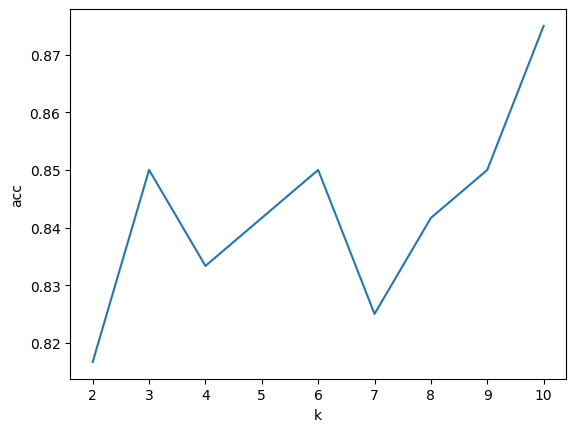

In [331]:
kval = []
acc = []
acc_nonormalized = []

for k in range(2, 11):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  # Makes a predictions based on the model
  y_pred = knn.predict(X_test)
  accval = knn.score(X_test, y_test) # Get mean accuracy of the model
  accval_nonormal = accuracy_score(y_test, y_pred, normalize=False) # Get non-normalized accuracy of the model
  # Print everything, not exactly performant code
  print("Prediction at K =", k)
  print(classification_report(y_test, y_pred)) # Generate a classification report
  print(confusion_matrix(y_test, y_pred)) # Generate a Confusion Matrix
  print("Accuracy Score (Mean, Normalized):", accval, " | Accuracy Score (non-normalized):", accval_nonormal) # Show the normalized/non-normalized accuracy

  # Append to the lists for further processing
  kval.append(k)
  acc.append(accval)
  acc_nonormalized.append(accval_nonormal)

# Create a dataplot with the normalized/mean accuracy
kval_acc_df = pd.DataFrame({'acc':acc, 'k':kval})
sns.lineplot(data=kval_acc_df, x="k", y="acc")

# Create a dataplot with the non-normalized accuracy
#kval_nnacc_df = pd.DataFrame({'accuracy non-normalized':acc_nonormalized, 'k':kval})
#sns.lineplot(data=kval_nnacc_df, x="k", y="accuracy non-normalized")

# Reuse the lists
del kval[:]
del acc[:]
del acc_nonormalized[:]

Question 5.3: What happened to the accuracy of the classifier at k>9 and why?

Accuracy decreased due to overfitting. Another fun test is to set K to ludicrously large numbers and see what happens. Eventually accuracy takes a drop off regardless of data split.

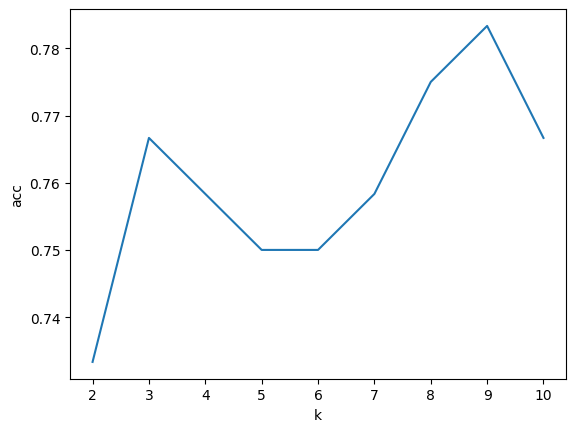

Question 6.1: Now try eliminating one of the features (Eender) from the dataset

In [332]:
# Drop Gender
SNA_edited_nogender=SNA_edited.drop(columns=['Gender'])
display(SNA_edited_nogender)
# Using the old dataset and modifying in place, produces some interesting results...
#SNA_edited=SNA_edited.drop(columns=['Gender'])
#display(SNA_edited)



,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


Prediction at K = 2
              precision    recall  f1-score   support

           0       0.71      0.97      0.82        73
           1       0.90      0.38      0.54        47

    accuracy                           0.74       120
   macro avg       0.80      0.68      0.68       120
weighted avg       0.78      0.74      0.71       120

[[71  2]
 [29 18]]
Accuracy Score (Mean, Normalized): 0.7416666666666667  | Accuracy Score (non-normalized): 89
Prediction at K = 3
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        73
           1       0.80      0.51      0.62        47

    accuracy                           0.76       120
   macro avg       0.77      0.71      0.72       120
weighted avg       0.77      0.76      0.74       120

[[67  6]
 [23 24]]
Accuracy Score (Mean, Normalized): 0.7583333333333333  | Accuracy Score (non-normalized): 91
Prediction at K = 4
              precision    recall  f1-score   support

       

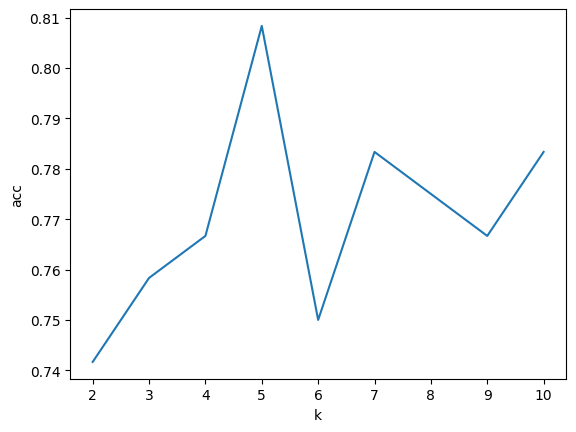

In [333]:
X = SNA_edited_nogender.iloc[:,:-1] # Get every column except the last one as X
y = SNA_edited_nogender.iloc[:,-1] # This is the last column for 'Purchased'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Split the new dataset, feel free to comment out if wanting to use the old dataset

# Same logic as above
for k in range(2, 11):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  # Makes a predictions based on the model
  y_pred = knn.predict(X_test)
  accval = knn.score(X_test, y_test) # Get mean accuracy of the model
  accval_nonormal = accuracy_score(y_test, y_pred, normalize=False) # Get non-normalized accuracy of the model
  # Print everything, not exactly performant code
  print("Prediction at K =", k)
  print(classification_report(y_test, y_pred)) # Generate a classification report
  print(confusion_matrix(y_test, y_pred)) # Generate a Confusion Matrix
  print("Accuracy Score (Mean, Normalized):", accval, " | Accuracy Score (non-normalized):", accval_nonormal) # Show the normalized/non-normalized accuracy

  # Append to the lists for further processing
  kval.append(k)
  acc.append(accval)
  acc_nonormalized.append(accval_nonormal)

# Create a dataplot with the normalized/mean accuracy
kval_acc_df = pd.DataFrame({'acc':acc, 'k':kval})
sns.lineplot(data=kval_acc_df, x="k", y="acc")

# Create a dataplot with the non-normalized accuracy
#kval_nnacc_df = pd.DataFrame({'accuracy non-normalized':acc_nonormalized, 'k':kval})
#sns.lineplot(data=kval_nnacc_df, x="k", y="accuracy non-normalized")

# Reuse the lists
del kval[:]
del acc[:]
del acc_nonormalized[:]

Question 6.3: What happened to the results? What's your conclusion? Plot accuracy vs k.

We see a marked decrease in accuracy shortly after K=2, down to low values around 3-5 and then back up. K=7-8 is the accuracy peak, and then dips beyond k=10. With the current dataset that has been split in my testing, we see an increase in false-negatives, although that can change with repeated runs of the notebook since we split the data into test/training sets again after we prune the 'Gender' column from the dataset.

Removed screenshot due to size of base64 encoded uri.



Question 7: Repeat steps 6.1-6.3 with another distance metric. Comment on what happens to the results?

Prediction at K = 2
              precision    recall  f1-score   support

           0       0.70      0.97      0.82        73
           1       0.89      0.36      0.52        47

    accuracy                           0.73       120
   macro avg       0.80      0.67      0.67       120
weighted avg       0.78      0.73      0.70       120

[[71  2]
 [30 17]]
Accuracy Score (Mean, Normalized): 0.7333333333333333  | Accuracy Score (non-normalized): 88
Prediction at K = 3
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        73
           1       0.80      0.43      0.56        47

    accuracy                           0.73       120
   macro avg       0.76      0.68      0.68       120
weighted avg       0.75      0.73      0.71       120

[[68  5]
 [27 20]]
Accuracy Score (Mean, Normalized): 0.7333333333333333  | Accuracy Score (non-normalized): 88
Prediction at K = 4
              precision    recall  f1-score   support

       

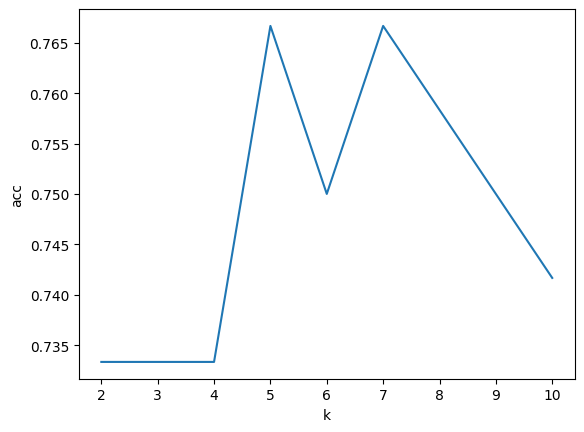

In [334]:
#X = SNA_edited_nogender.iloc[:,:-1] # Get every column except the last one as X
#y = SNA_edited_nogender.iloc[:,-1] # This is the last column for 'Purchased' and what we are trying to predict
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Specify test_size because otherwise it'll fail, also since it randomly selects data points we may get different results

for k in range(2, 11):
  knn = KNeighborsClassifier(n_neighbors = k, metric="chebyshev") # using chebyshev: max(|x - y|)
  knn.fit(X_train, y_train)
  # Makes a predictions based on the model
  y_pred = knn.predict(X_test)
  accval = knn.score(X_test, y_test) # Get mean accuracy of the model
  accval_nonormal = accuracy_score(y_test, y_pred, normalize=False) # Get non-normalized accuracy of the model
  # Print everything, not exactly performant code
  print("Prediction at K =", k)
  print(classification_report(y_test, y_pred)) # Generate a classification report
  print(confusion_matrix(y_test, y_pred)) # Generate a Confusion Matrix
  print("Accuracy Score (Mean, Normalized):", accval, " | Accuracy Score (non-normalized):", accval_nonormal) # Show the normalized/non-normalized accuracy

  # Append to the lists for further processing
  kval.append(k)
  acc.append(accval)
  acc_nonormalized.append(accval_nonormal)

# Create a dataplot with the normalized/mean accuracy
kval_acc_df = pd.DataFrame({'acc':acc, 'k':kval})
sns.lineplot(data=kval_acc_df, x="k", y="acc")

# Create a dataplot with the non-normalized accuracy
#kval_nnacc_df = pd.DataFrame({'accuracy non-normalized':acc_nonormalized, 'k':kval})
#sns.lineplot(data=kval_nnacc_df, x="k", y="accuracy non-normalized")

# Reuse the lists
del kval[:]
del acc[:]
del acc_nonormalized[:]

# Analysis

We run the same code as above but with a different distance metric, opting instead for the "chebyshev" distance metric which is calculated using chebyshev = max(|x - y|), which results in a maximum of the absolute value of x-y at given k. We see a similar dip, earlier than before and a dip after 9 in this example.

Removed screenshot due to size of base64 encoded uri.